<a href="https://colab.research.google.com/github/DanielCM2/P-code/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle Datasets/segmentation data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


<Axes: xlabel='Sex', ylabel='Income'>

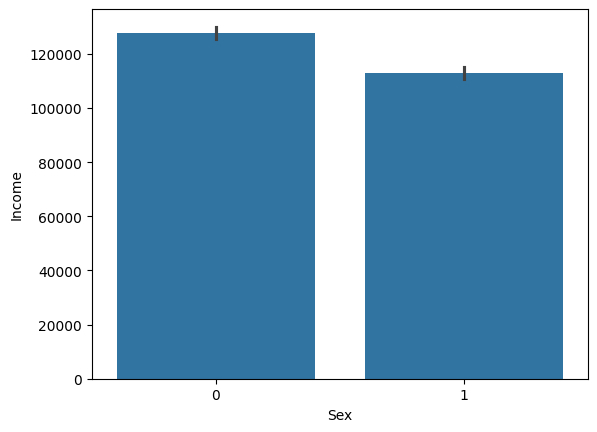

In [ ]:
sns.barplot(x='Sex',y='Income',data=df)

<Axes: xlabel='Education', ylabel='Income'>

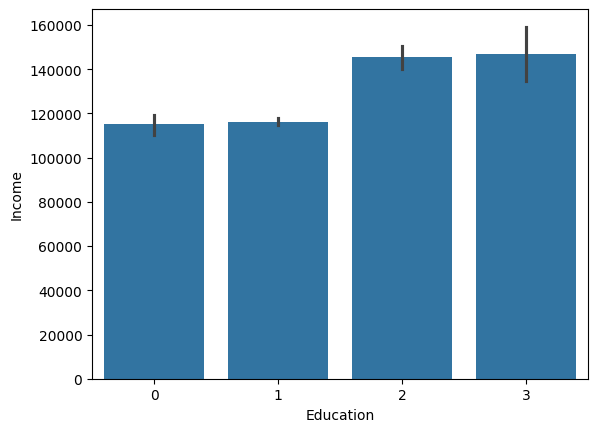

In [ ]:
sns.barplot(x='Education',y='Income',data=df)

<Axes: xlabel='Income', ylabel='Count'>

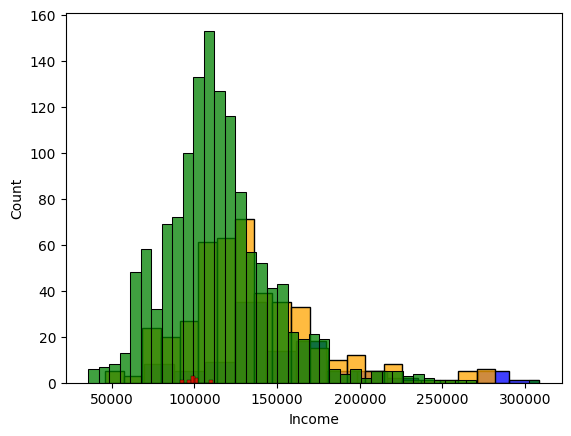

In [ ]:
sns.histplot(data=df.loc[df['Age']>60],x='Income',color='blue')
sns.histplot(data=df.loc[(df['Age']>40)&(df['Age']<60)],x='Income',color='orange')
sns.histplot(data=df.loc[(df['Age']>20)&(df['Age']<40)],x='Income',color='green')
sns.histplot(data=df.loc[df['Age']<20],x='Income',color='red')

<Axes: xlabel='Age', ylabel='Count'>

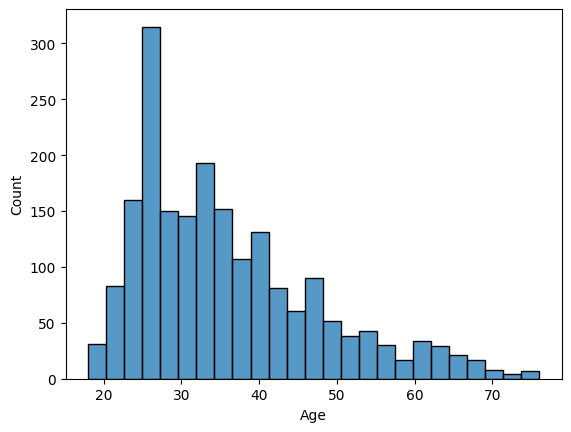

In [ ]:
sns.histplot(data=df,x='Age')

In [ ]:
def optimize_k_means(data, max_k):
  means=[]
  inertias=[]

  for k in range(1,max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    means.append(k)
    inertias.append(kmeans.inertia_)

  #Generate elbow plot
  fig = plt.subplots(figsize=(12,8))
  plt.plot(means,inertias,'o-')
  plt.xlabel('Number of clusters')
  plt.ylabel('Inertia')
  plt.grid(True)
  plt.show()

In [ ]:
df_SM = df[['Sex','Marital status']]
df_SA = df[['Sex', 'Age']]
df_SE = df[['Sex', 'Education']]
df_SI = df[['Sex', 'Income']]
df_SO = df[['Sex', 'Occupation']]
df_SS = df[['Sex', 'Settlement size']]

In [ ]:
df_MA = df[['Marital status', 'Age']]
df_ME = df[['Marital status', 'Education']]
df_MI = df[['Marital status', 'Income']]
df_MO = df[['Marital status', 'Occupation']]
df_MS = df[['Marital status', 'Settlement size']]

In [ ]:
df_AE = df[['Age', 'Education']]
df_AI = df[['Age', 'Income']]
df_AO = df[['Age', 'Occupation']]
df_AS = df[['Age', 'Settlement size']]

In [ ]:
df_EI = df[['Education', 'Income']]
df_EO = df[['Education', 'Occupation']]
df_ES = df[['Education', 'Settlement size']]

In [ ]:
df_IO = df[['Income', 'Occupation']]
df_IS = df[['Income', 'Settlement size']]

In [ ]:
df_OS = df[['Occupation', 'Settlement size']]

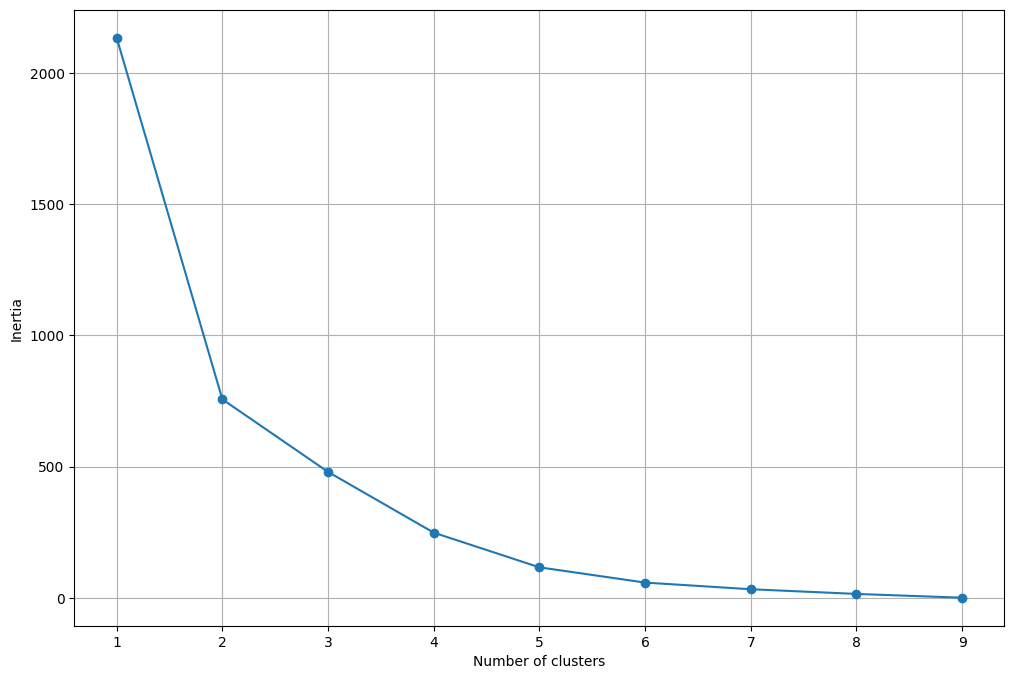

In [ ]:
optimize_k_means(df_OS,10)

# **Sex - Marital Status**

In [ ]:
kmeans = KMeans(n_clusters=3)

df_SM["Cluster"] = kmeans.fit_predict(df_SM)
df_SM["Cluster"] = df_SM["Cluster"].astype("category")

df_SM.head()

,Sex,Marital status,Cluster
0,0,0,1
1,1,1,0
2,0,0,1
3,0,0,1
4,0,0,1


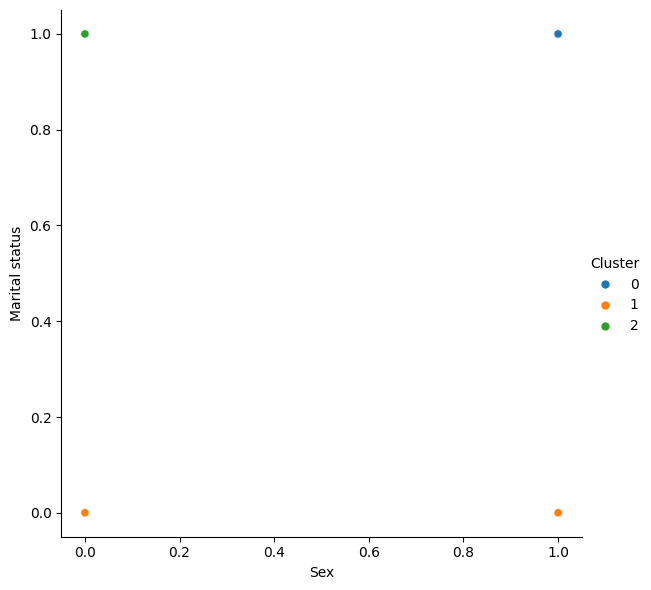

In [ ]:
sns.relplot(
    x="Sex", y="Marital status", hue="Cluster", data=df_SM, height=6,
);

<Axes: xlabel='Marital status', ylabel='Count'>

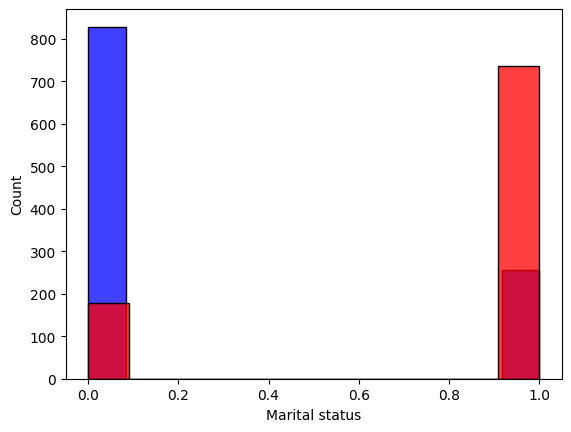

In [ ]:
sns.histplot(data=df.loc[df_SM['Sex']==0], x='Marital status', color='blue')
sns.histplot(data=df.loc[df_SM['Sex']==1], x='Marital status', color ='red')

In [ ]:
for k in range(1,6):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df)
  df[f'Kmenas_{k}'] = kmeans.labels_

df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster,Kmenas_1,Kmenas_2,Kmenas_3,Kmenas_4,Kmenas_5
0,100000001,0,0,67,2,124670,1,2,1,0,0,2,3,0
1,100000002,1,1,22,1,150773,1,2,3,0,1,2,2,2
2,100000003,0,0,49,1,89210,0,0,0,0,0,1,0,3
3,100000004,0,0,45,1,171565,1,1,3,0,1,0,2,2
4,100000005,0,0,53,1,149031,1,1,3,0,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,1,0,0,2,3,0
1996,100001997,1,1,27,1,117744,1,0,1,0,0,2,3,1
1997,100001998,0,0,31,0,86400,0,0,0,0,0,1,0,3
1998,100001999,1,1,24,1,97968,0,0,1,0,0,1,3,1


In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i,ax in enumerate(fig.axes, start=1):
  ax.scatter(x=df)

In [ ]:
X1 = df.loc[:,['Age','Education','Income']]
k = KMeans(n_clusters=3)
X1['Cluster']=k.fit_predict(X1)
X1['Cluster']=X1[].astype('category')
X1.head()

,Age,Education,Income,Cluster
0,67,2,124670,2
1,22,1,150773,2
2,49,1,89210,1
3,45,1,171565,0
4,53,1,149031,2


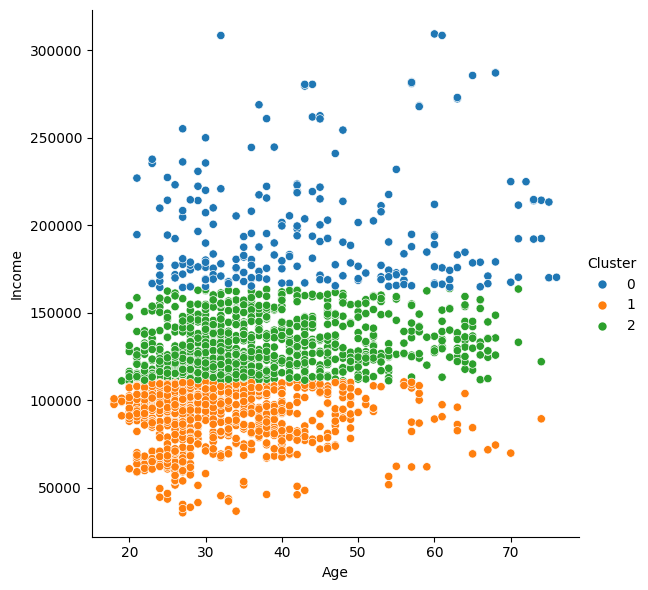

In [ ]:
sns.relplot(
    x="Age", y="Income", hue="Cluster", data=X1, height=6,
);

# **Sex-Education**

In [ ]:
kmeans = KMeans(n_clusters=4)

df_SE["Cluster"] = kmeans.fit_predict(df_SE)
df_SE["Cluster"] = df_SE["Cluster"].astype("category")

df_SE.head()

,Sex,Education,Cluster
0,0,2,1
1,1,1,0
2,0,1,3
3,0,1,3
4,0,1,3


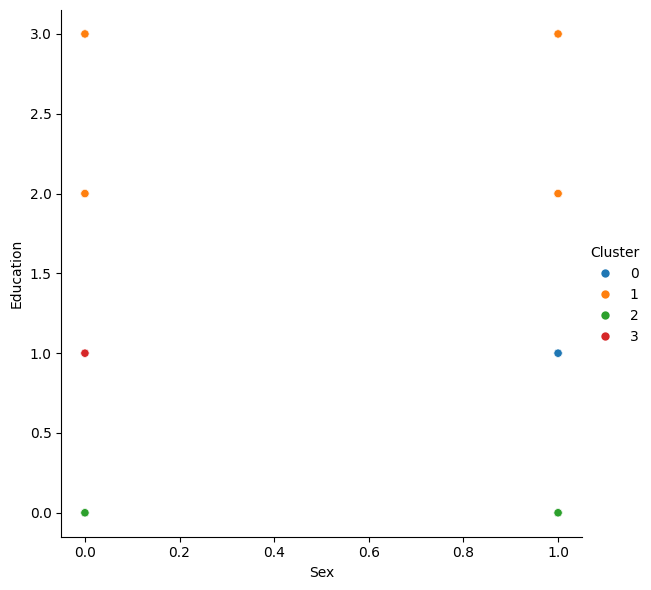

In [ ]:
sns.relplot(
    x="Sex", y="Education", hue="Cluster", data=df_SE, height=6,
);

<Axes: xlabel='Education', ylabel='Count'>

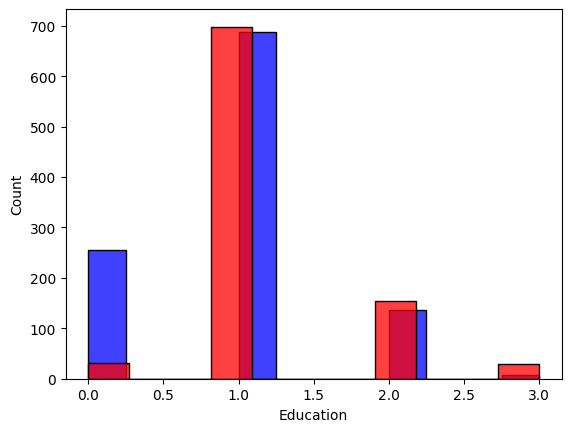

In [ ]:
sns.histplot(data=df.loc[df_SE['Sex']==0], x='Education', color='blue')
sns.histplot(data=df.loc[df_SE['Sex']==1], x='Education', color ='red')

# **Sex-Income**

In [ ]:
kmeans = KMeans(n_clusters=3)

df_SI["Cluster"] = kmeans.fit_predict(df_SI)
df_SI["Cluster"] = df_SI["Cluster"].astype("category")

df_SI.head()

,Sex,Income,Cluster
0,0,124670,2
1,1,150773,2
2,0,89210,0
3,0,171565,1
4,0,149031,2


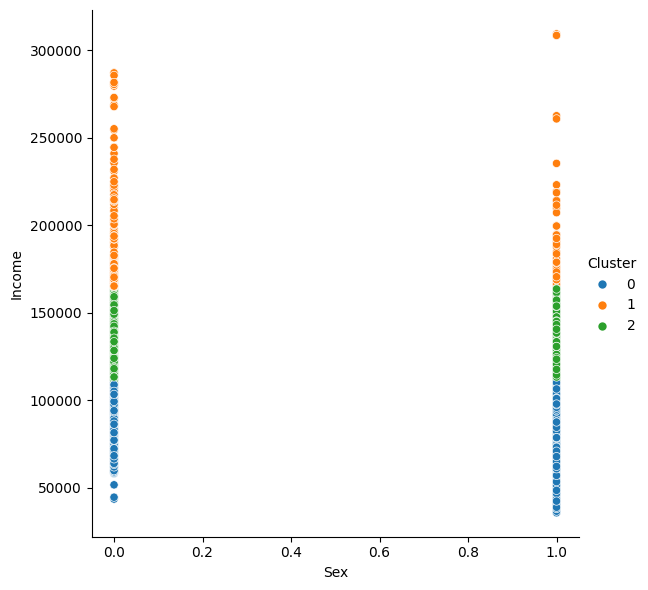

In [ ]:
sns.relplot(
    x="Sex", y="Income", hue="Cluster", data=df_SI, height=6,
);

<Axes: xlabel='Income', ylabel='Count'>

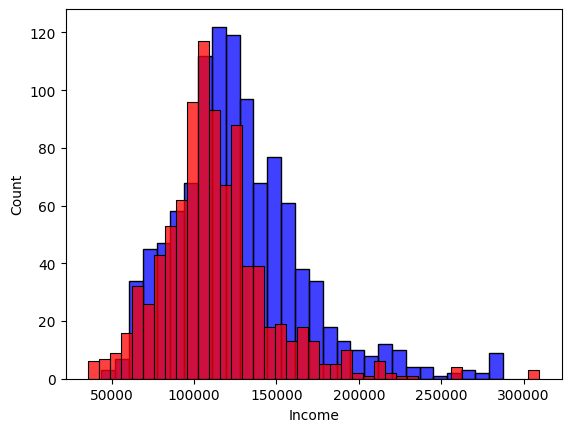

In [ ]:
sns.histplot(data=df.loc[df_SI['Sex']==0], x='Income', color='blue')
sns.histplot(data=df.loc[df_SI['Sex']==1], x='Income', color ='red')

<Axes: xlabel='Sex', ylabel='Income'>

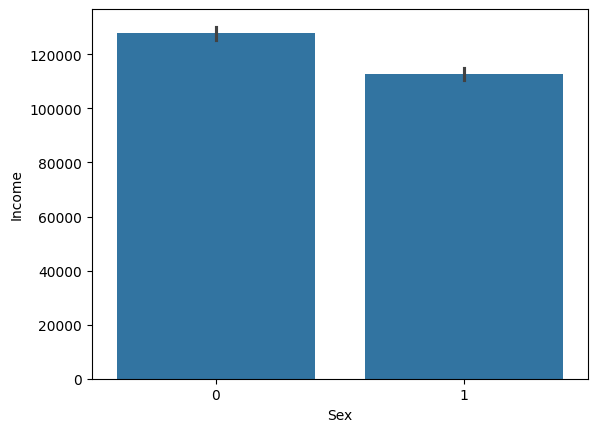

In [ ]:
sns.barplot(x='Sex',y='Income',data=df_SI)

# **Sex-Occupation**

In [ ]:
kmeans = KMeans(n_clusters=4)

df_SO["Cluster"] = kmeans.fit_predict(df_SO)
df_SO["Cluster"] = df_SO["Cluster"].astype("category")

df_SO.head()

,Sex,Occupation,Cluster
0,0,1,0
1,1,1,2
2,0,0,3
3,0,1,0
4,0,1,0


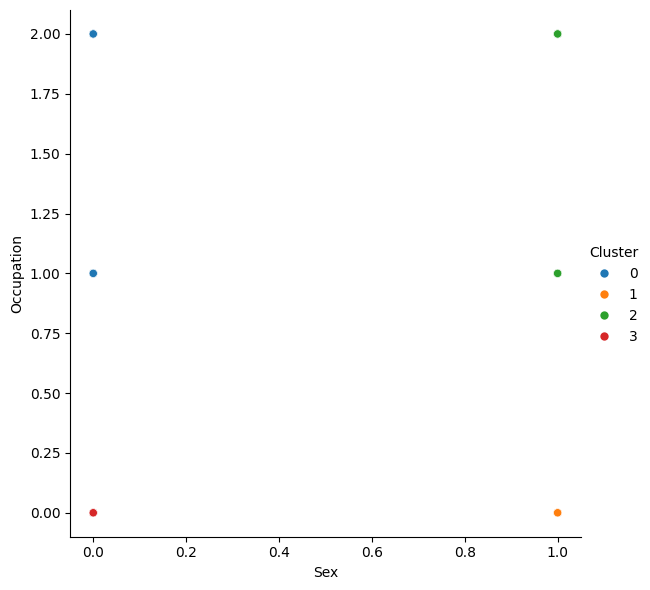

In [ ]:
sns.relplot(
    x="Sex", y="Occupation", hue="Cluster", data=df_SO, height=6,
);

<Axes: xlabel='Occupation', ylabel='Count'>

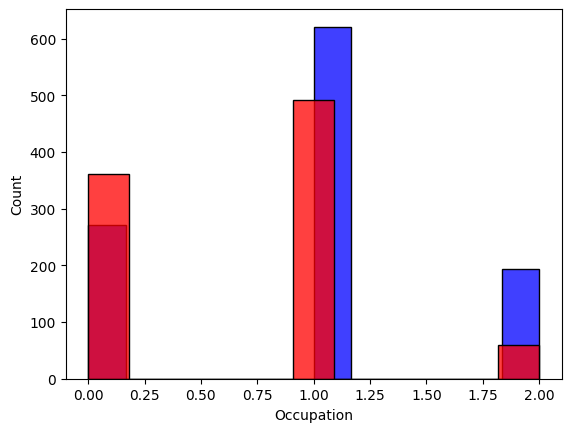

In [ ]:
sns.histplot(data=df.loc[df_SO['Sex']==0], x='Occupation', color='blue')
sns.histplot(data=df.loc[df_SO['Sex']==1], x='Occupation', color ='red')

<Axes: xlabel='Sex', ylabel='Occupation'>

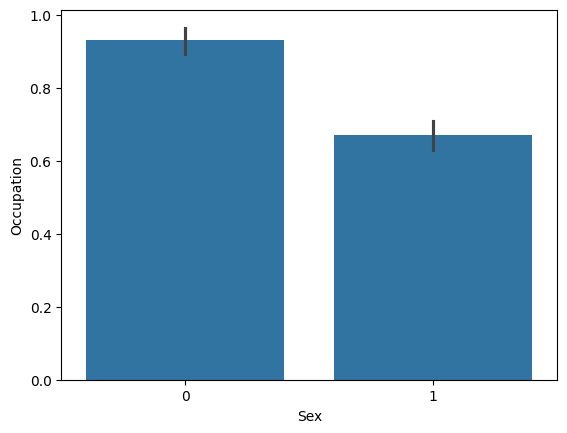

In [ ]:
sns.barplot(x='Sex',y='Occupation',data=df_SO)

# **Sex-Settlement size**

In [ ]:
kmeans = KMeans(n_clusters=4)

df_SS["Cluster"] = kmeans.fit_predict(df_SS)
df_SS["Cluster"] = df_SS["Cluster"].astype("category")

df_SS.head()

,Sex,Settlement size,Cluster
0,0,2,1
1,1,2,1
2,0,0,2
3,0,1,3
4,0,1,3


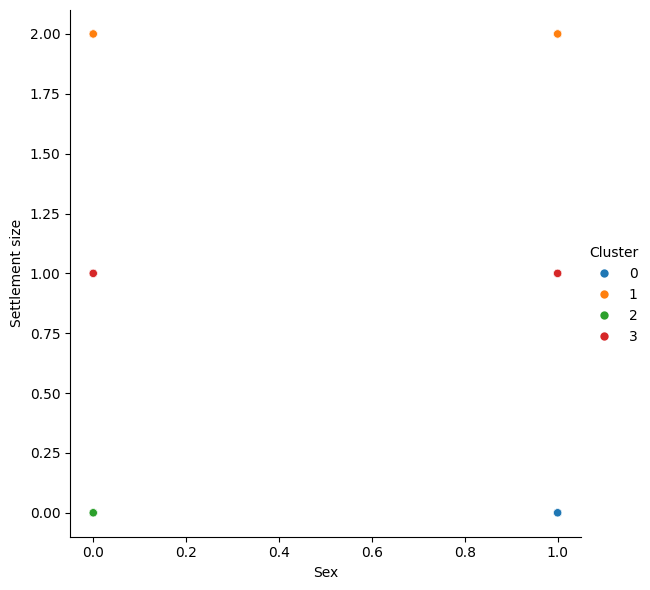

In [ ]:
sns.relplot(
    x="Sex", y="Settlement size", hue="Cluster", data=df_SS, height=6,
);

<Axes: xlabel='Settlement size', ylabel='Count'>

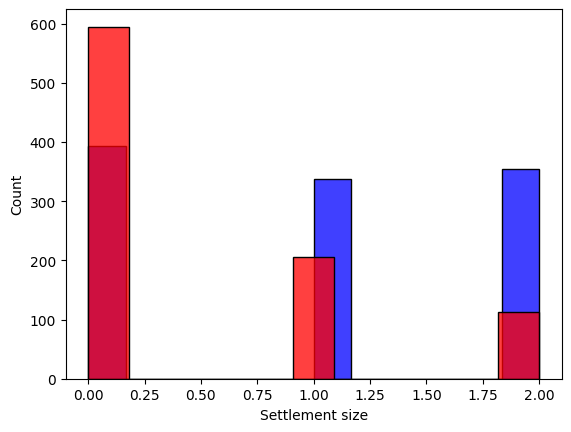

In [ ]:
sns.histplot(data=df.loc[df_SS['Sex']==0], x='Settlement size', color='blue')
sns.histplot(data=df.loc[df_SS['Sex']==1], x='Settlement size', color ='red')

# **Marital - Age**

In [ ]:
kmeans = KMeans(n_clusters=3)

df_MA["Cluster"] = kmeans.fit_predict(df_MA)
df_MA["Cluster"] = df_MA["Cluster"].astype("category")

df_MA.head()

,Marital status,Age,Cluster
0,0,67,2
1,1,22,1
2,0,49,0
3,0,45,0
4,0,53,2


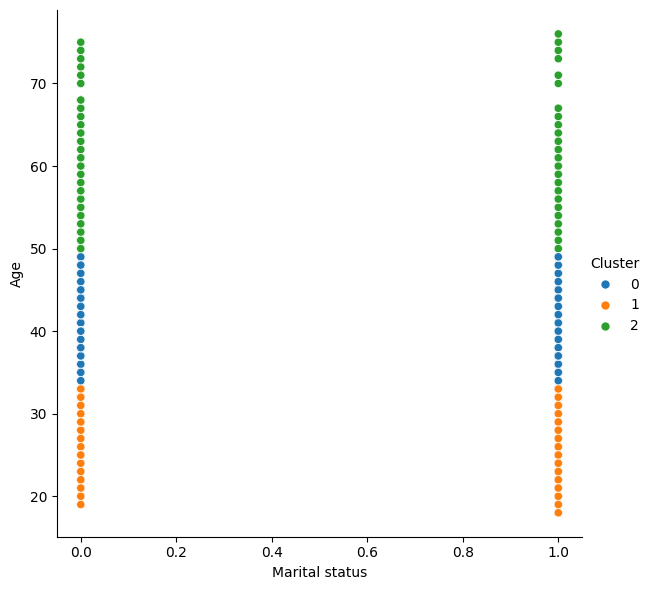

In [ ]:
sns.relplot(
    x="Marital status", y="Age", hue="Cluster", data=df_MA, height=6,
);

<Axes: xlabel='Age', ylabel='Count'>

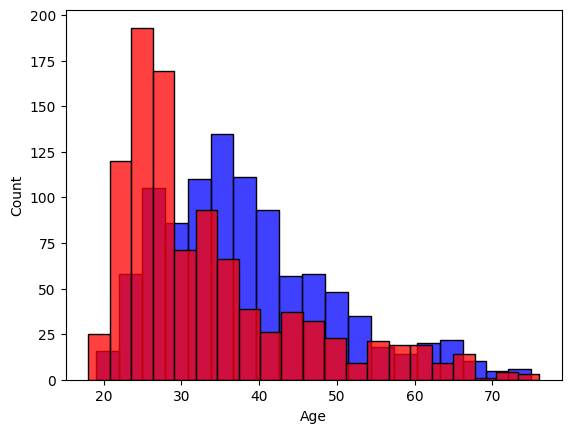

In [ ]:
sns.histplot(data=df.loc[df_MA['Marital status']==0], x='Age', color='blue')
sns.histplot(data=df.loc[df_MA['Marital status']==1], x='Age', color ='red')

# **Marital - Edu**

In [ ]:
kmeans = KMeans(n_clusters=3)

df_ME["Cluster"] = kmeans.fit_predict(df_ME)
df_ME["Cluster"] = df_ME["Cluster"].astype("category")

df_ME.head()

,Marital status,Education,Cluster
0,0,2,2
1,1,1,0
2,0,1,1
3,0,1,1
4,0,1,1


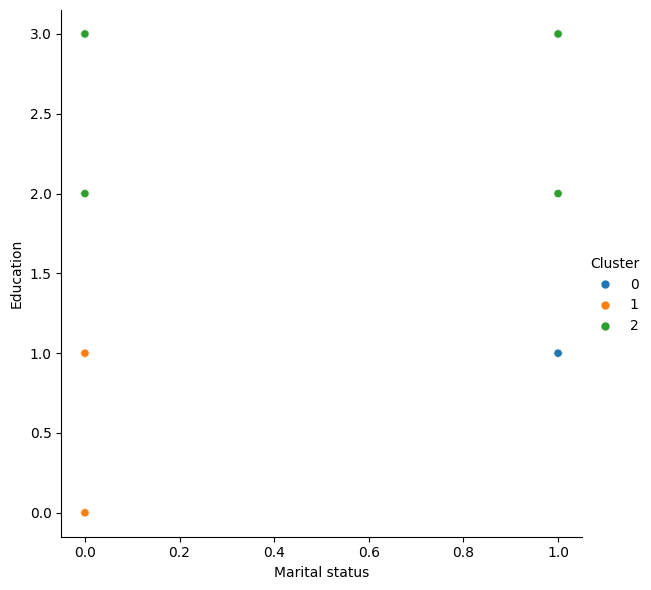

In [ ]:
sns.relplot(
    x="Marital status", y="Education", hue="Cluster", data=df_ME, height=6,
);

<Axes: xlabel='Education', ylabel='Count'>

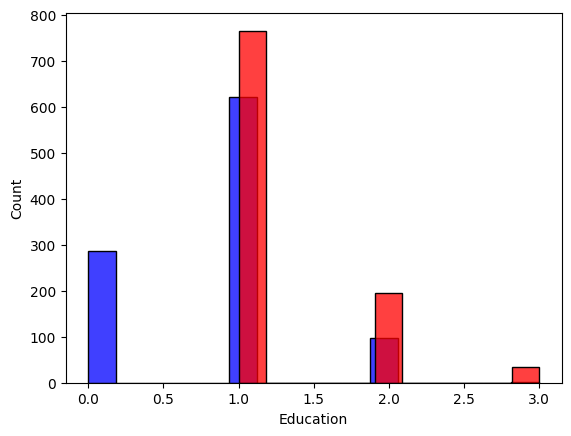

In [ ]:
sns.histplot(data=df.loc[df_ME['Marital status']==0], x='Education', color='blue')
sns.histplot(data=df.loc[df_ME['Marital status']==1], x='Education', color ='red')

# **Marital - Income**

In [ ]:
kmeans = KMeans(n_clusters=3)

df_MI["Cluster"] = kmeans.fit_predict(df_MI)
df_MI["Cluster"] = df_MI["Cluster"].astype("category")

df_MI.head()

,Marital status,Income,Cluster
0,0,124670,0
1,1,150773,0
2,0,89210,1
3,0,171565,2
4,0,149031,0


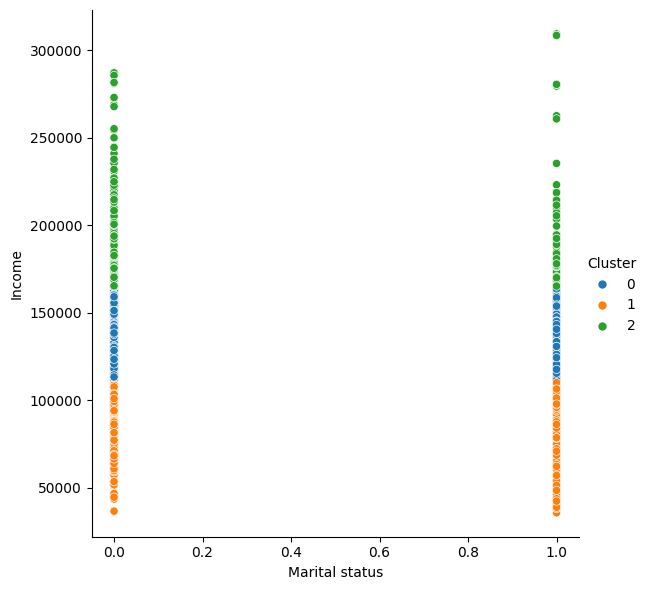

In [ ]:
sns.relplot(
    x="Marital status", y="Income", hue="Cluster", data=df_MI, height=6,
);

<Axes: xlabel='Marital status', ylabel='Income'>

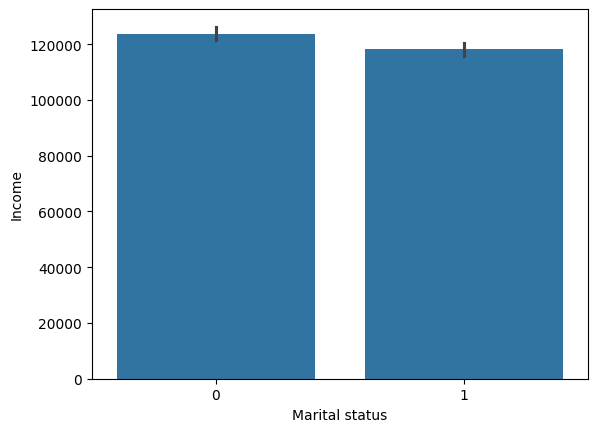

In [ ]:
sns.barplot(x='Marital status',y='Income',data=df_MI)

<Axes: xlabel='Marital status', ylabel='Income'>

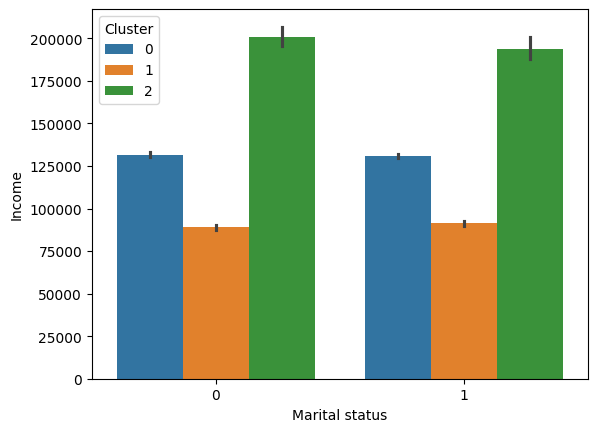

In [ ]:
sns.barplot(x='Marital status',y='Income',hue='Cluster',data=df_MI)

# **Marital - Occupation**

In [ ]:
kmeans = KMeans(n_clusters=4)

df_MO["Cluster"] = kmeans.fit_predict(df_MO)
df_MO["Cluster"] = df_MO["Cluster"].astype("category")

df_MO.head()

,Marital status,Occupation,Cluster
0,0,1,2
1,1,1,1
2,0,0,0
3,0,1,2
4,0,1,2


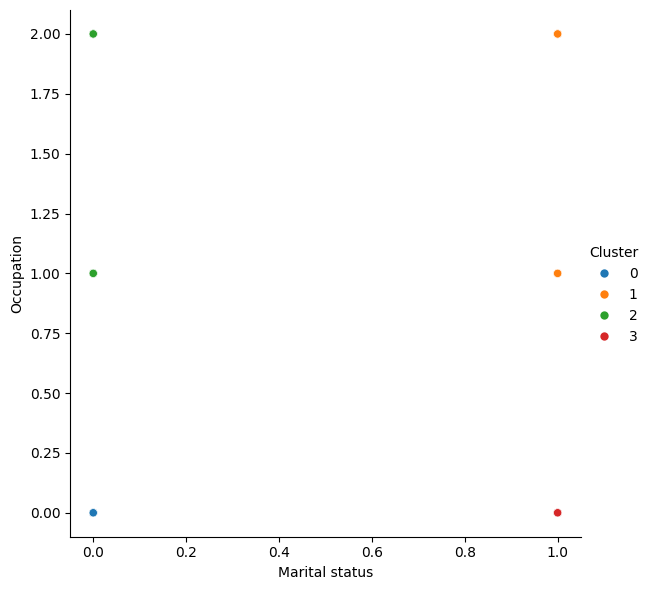

In [ ]:
sns.relplot(
    x="Marital status", y="Occupation", hue="Cluster", data=df_MO, height=6,
);

<Axes: xlabel='Occupation', ylabel='Count'>

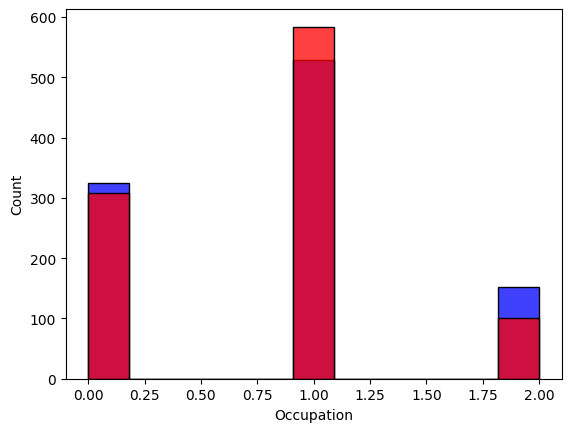

In [ ]:
sns.histplot(data=df.loc[df_MO['Marital status']==0], x='Occupation', color='blue')
sns.histplot(data=df.loc[df_MO['Marital status']==1], x='Occupation', color ='red')

# **Marital - Settlement size**

In [ ]:
kmeans = KMeans(n_clusters=3)

df_MS["Cluster"] = kmeans.fit_predict(df_MS)
df_MS["Cluster"] = df_MS["Cluster"].astype("category")

df_MS.head()

,Marital status,Settlement size,Cluster
0,0,2,1
1,1,2,1
2,0,0,2
3,0,1,2
4,0,1,2


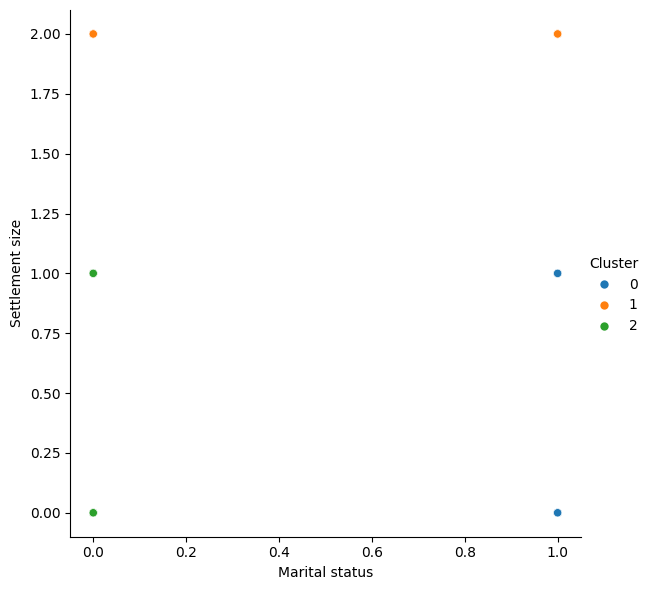

In [ ]:
sns.relplot(
    x="Marital status", y="Settlement size", hue="Cluster", data=df_MS, height=6,
);

<Axes: xlabel='Marital status', ylabel='Settlement size'>

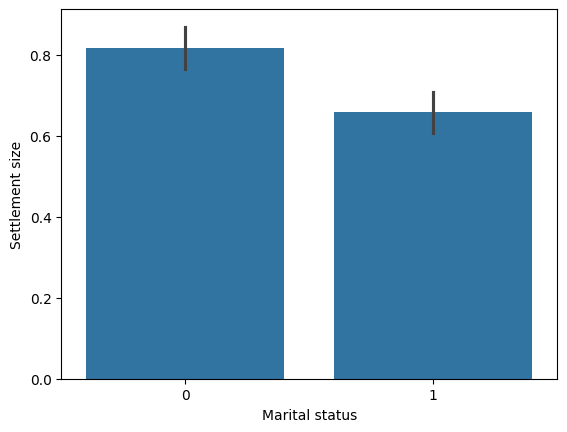

In [ ]:
sns.barplot(x='Marital status',y='Settlement size',data=df_MS)

<Axes: xlabel='Marital status', ylabel='Settlement size'>

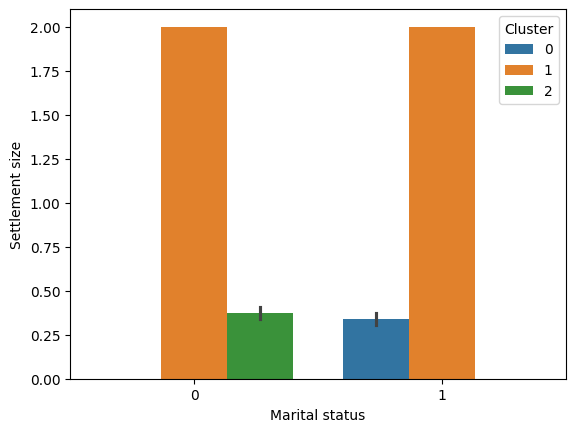

In [ ]:
sns.barplot(x='Marital status',y='Settlement size',hue='Cluster',data=df_MS)

<Axes: xlabel='Settlement size', ylabel='Count'>

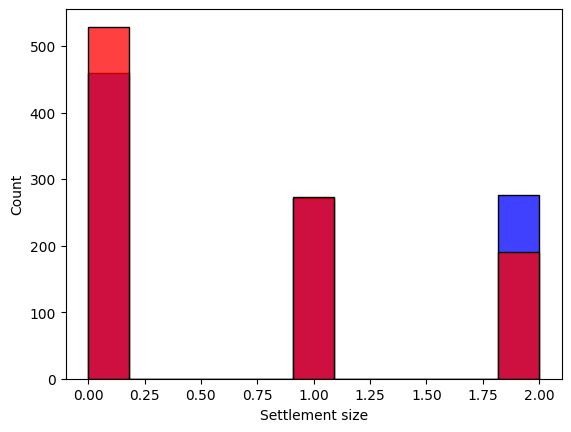

In [ ]:
sns.histplot(data=df.loc[df_MS['Marital status']==0], x='Settlement size', color='blue')
sns.histplot(data=df.loc[df_MS['Marital status']==1], x='Settlement size', color ='red')

# **Age-Education**

In [ ]:
kmeans = KMeans(n_clusters=4)

df_AE["Cluster"] = kmeans.fit_predict(df_AE)
df_AE["Cluster"] = df_AE["Cluster"].astype("category")

df_AE.head()

,Age,Education,Cluster
0,67,2,2
1,22,1,3
2,49,1,1
3,45,1,1
4,53,1,1


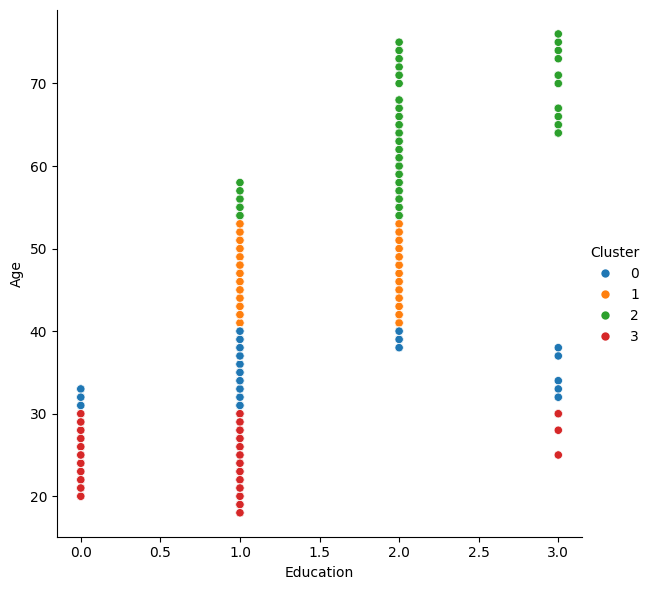

In [ ]:
sns.relplot(
    x="Education", y="Age", hue="Cluster", data=df_AE, height=6,
);

<Axes: xlabel='Education', ylabel='Age'>

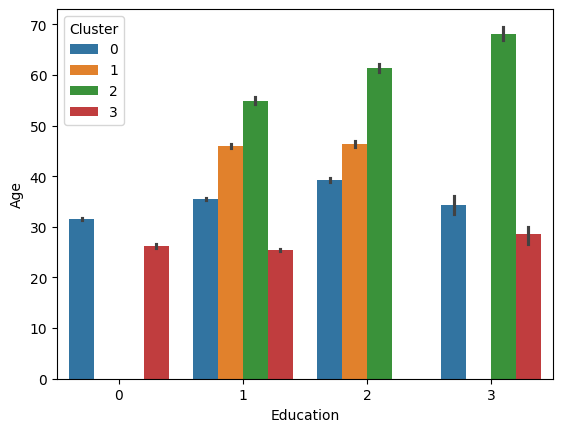

In [ ]:
sns.barplot(x='Education',y='Age',hue='Cluster',data=df_AE)

<Axes: xlabel='Age', ylabel='Count'>

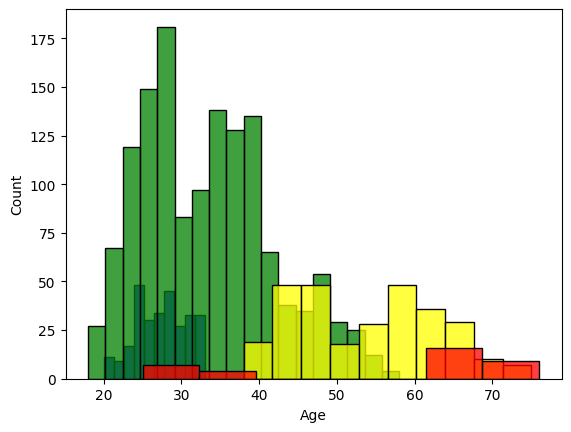

In [ ]:
sns.histplot(data=df.loc[df_AE['Education']==0], x='Age', color='blue')
sns.histplot(data=df.loc[df_AE['Education']==1], x='Age', color ='green')
sns.histplot(data=df.loc[df_AE['Education']==2], x='Age', color='yellow')
sns.histplot(data=df.loc[df_AE['Education']==3], x='Age', color ='red')

# **Age-Income**

In [ ]:
kmeans = KMeans(n_clusters=4)

df_AI["Cluster"] = kmeans.fit_predict(df_AI)
df_AI["Cluster"] = df_AI["Cluster"].astype("category")

df_AI.head()

,Age,Income,Cluster
0,67,124670,0
1,22,150773,2
2,49,89210,3
3,45,171565,2
4,53,149031,2


In [ ]:
df_AI.loc[df_AI['Cluster']==0].describe()

,Age,Income
count,953.000000,953.000000
mean,34.381952,114750.033578
std,10.636812,10179.769727
min,18.000000,96952.000000
25%,26.000000,106629.000000
50%,32.000000,113878.000000
75%,40.000000,123497.000000
max,74.000000,134350.000000


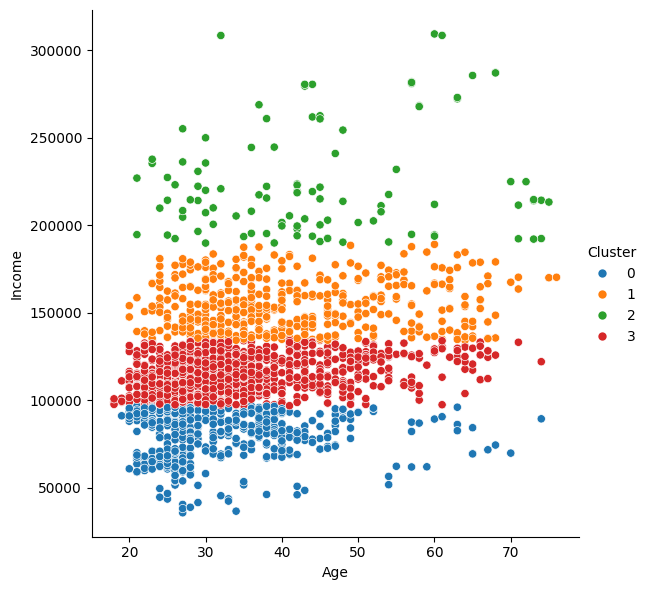

In [ ]:
sns.relplot(
    x="Age", y="Income", hue="Cluster", data=df_AI, height=6,
);

<Axes: xlabel='Income', ylabel='Count'>

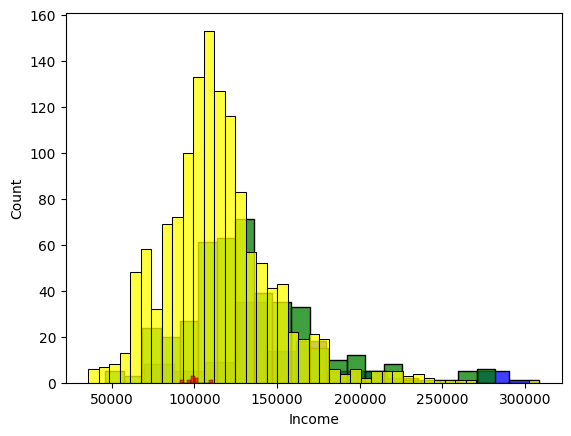

In [ ]:
sns.histplot(data=df.loc[df_AI['Age']>60], x='Income', color='blue')
sns.histplot(data=df.loc[(df_AI['Age']>40)&(df_AI['Age']<60)], x='Income', color ='green')
sns.histplot(data=df.loc[(df_AI['Age']>20)&(df_AI['Age']<40)], x='Income', color='yellow')
sns.histplot(data=df.loc[df_AI['Age']<20], x='Income', color ='red')

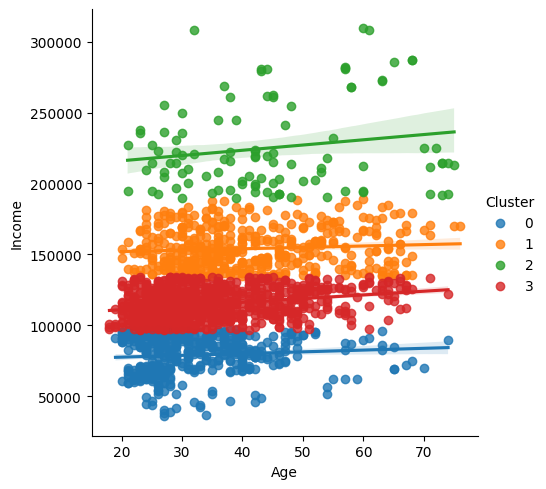

In [ ]:
sns.lmplot(x='Age',y='Income',hue='Cluster',data=df_AI)

# **Age-Occupation**

In [ ]:
kmeans = KMeans(n_clusters=3)

df_AO["Cluster"] = kmeans.fit_predict(df_AO)
df_AO["Cluster"] = df_AO["Cluster"].astype("category")

df_AO.head()

,Age,Occupation,Cluster
0,67,1,2
1,22,1,0
2,49,0,1
3,45,1,1
4,53,1,2


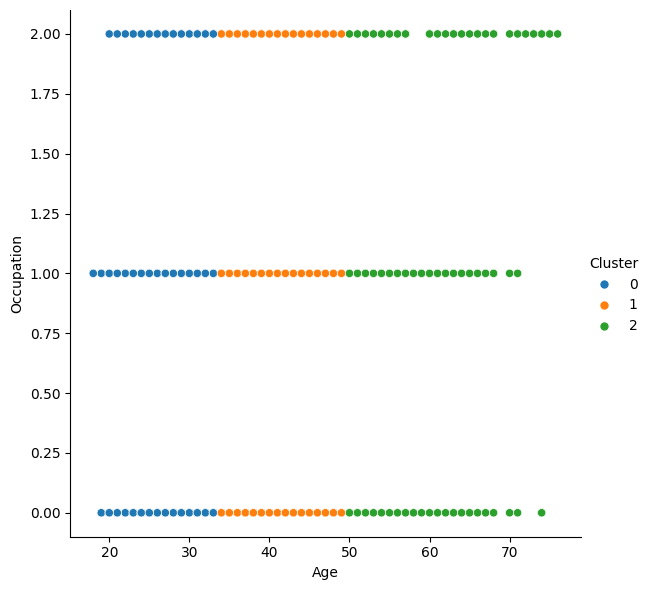

In [ ]:
sns.relplot(
    x="Age", y="Occupation", hue="Cluster", data=df_AO, height=6,
);

<Axes: xlabel='Occupation', ylabel='Age'>

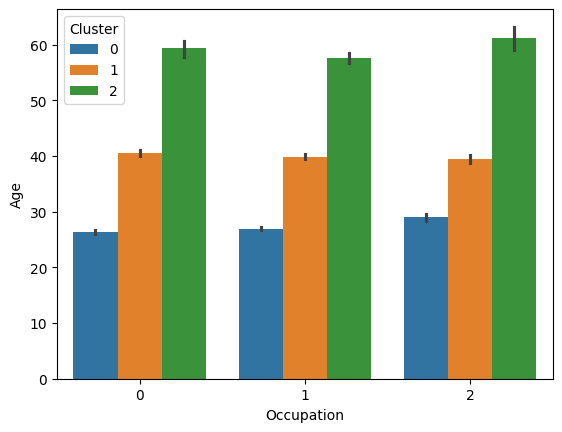

In [ ]:
sns.barplot(x='Occupation',y='Age',hue='Cluster',data=df_AO)

<Axes: xlabel='Occupation', ylabel='Age'>

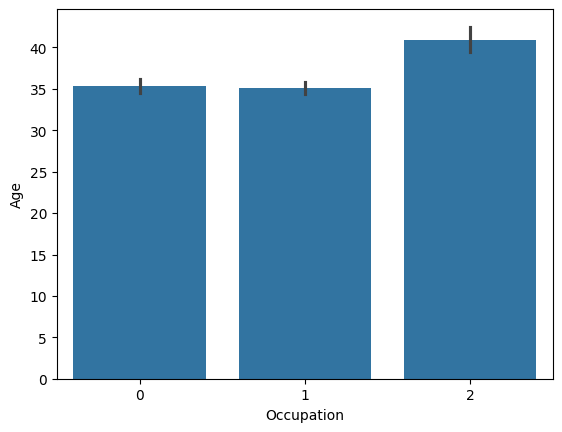

In [ ]:
sns.barplot(x='Occupation',y='Age',data=df_AO)

# **Age-Settlement size**

In [ ]:
kmeans = KMeans(n_clusters=3)

df_AS["Cluster"] = kmeans.fit_predict(df_AS)
df_AS["Cluster"] = df_AS["Cluster"].astype("category")

df_AS.head()

,Age,Settlement size,Cluster
0,67,2,2
1,22,2,1
2,49,0,2
3,45,1,0
4,53,1,2


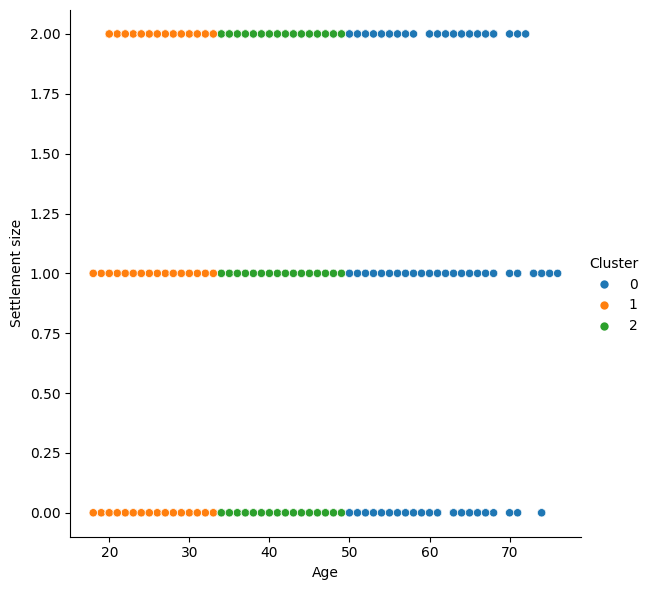

In [ ]:
sns.relplot(
    x="Age", y="Settlement size", hue="Cluster", data=df_AS, height=6,
);

<Axes: xlabel='Settlement size', ylabel='Age'>

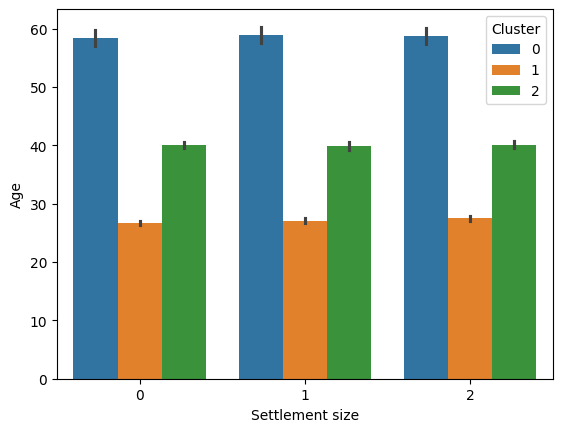

In [ ]:
sns.barplot(x='Settlement size',y='Age',hue='Cluster',data=df_AS)

# **Education-Income**

In [ ]:
kmeans = KMeans(n_clusters=3)

df_EI["Cluster"] = kmeans.fit_predict(df_EI)
df_EI["Cluster"] = df_EI["Cluster"].astype("category")

df_EI.head()

,Education,Income,Cluster
0,2,124670,2
1,1,150773,2
2,1,89210,0
3,1,171565,1
4,1,149031,2


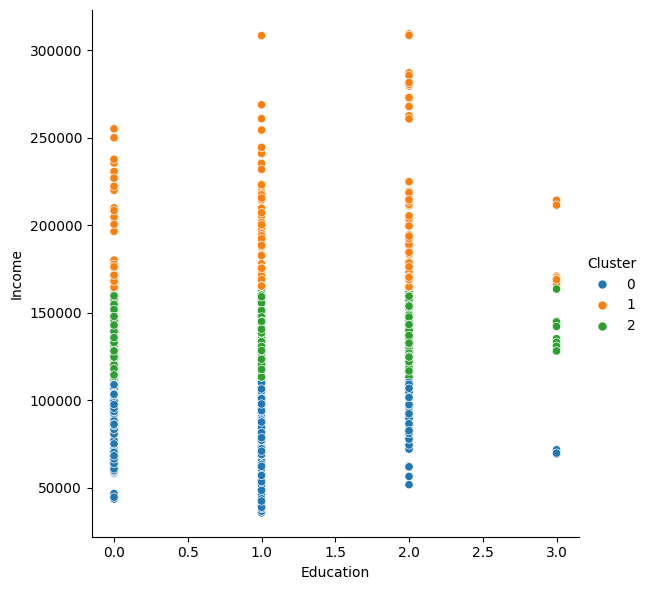

In [ ]:
sns.relplot(
    x="Education", y="Income", hue="Cluster", data=df_EI, height=6,
);

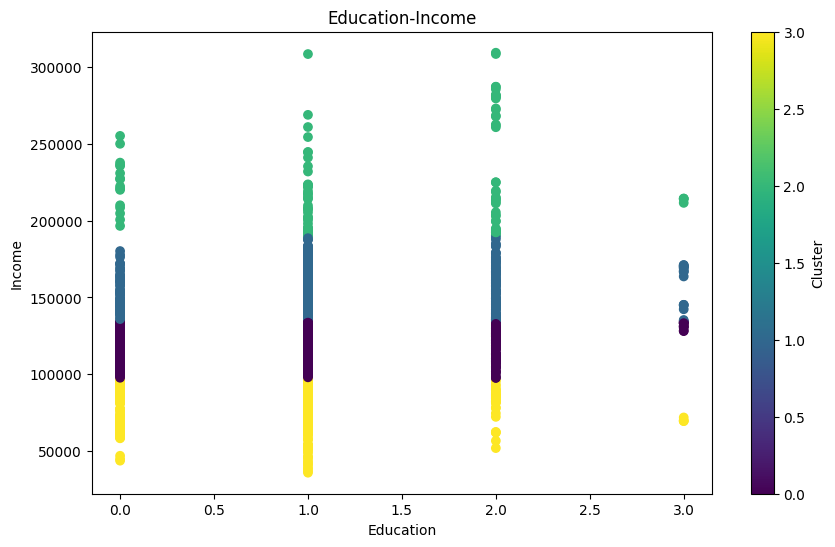

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_EI['Education'], df_EI['Income'], c=df_EI['Cluster'], cmap='viridis')
plt.xlabel('Education')
plt.ylabel('Income')
plt.title('Education-Income')
_ = plt.colorbar(label='Cluster')

<Axes: xlabel='Income', ylabel='Count'>

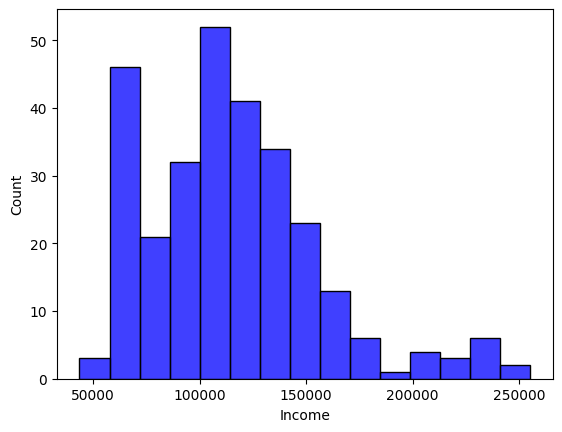

In [ ]:
sns.histplot(data=df.loc[df_EI['Education']==0], x='Income', color='blue')

# **EDucation-Occupation**

In [ ]:
kmeans = KMeans(n_clusters=5)

df_EO["Cluster"] = kmeans.fit_predict(df_EO)
df_EO["Cluster"] = df_EO["Cluster"].astype("category")

df_EO.head()

,Education,Occupation,Cluster
0,2,1,4
1,1,1,0
2,1,0,1
3,1,1,0
4,1,1,0


''

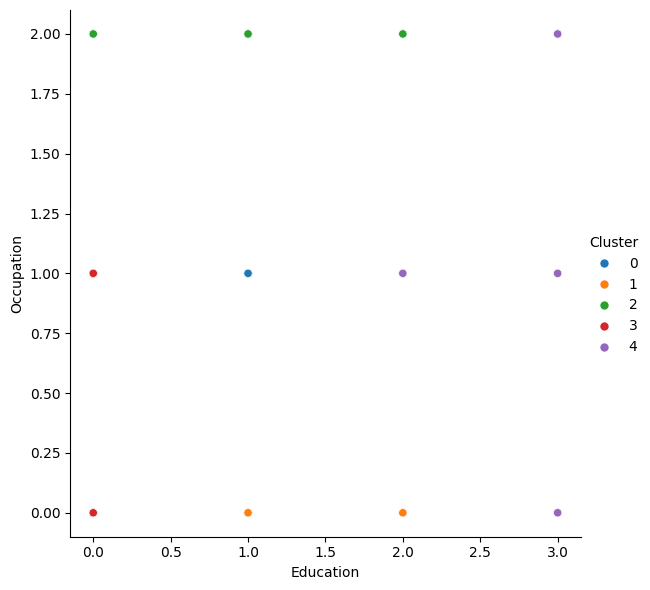

In [ ]:
sns.relplot(
    x="Education", y="Occupation", hue="Cluster", data=df_EO, height=6,
);""

# **Education-Settlement size**

In [ ]:
kmeans = KMeans(n_clusters=3)

df_ES["Cluster"] = kmeans.fit_predict(df_ES)
df_ES["Cluster"] = df_ES["Cluster"].astype("category")

df_ES.head()

,Education,Settlement size,Cluster
0,2,2,1
1,1,2,1
2,1,0,2
3,1,1,0
4,1,1,0


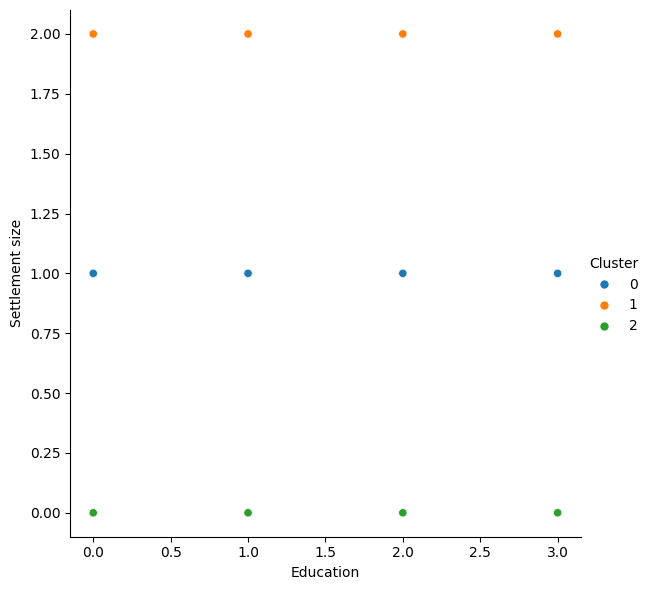

In [ ]:
sns.relplot(
    x="Education", y="Settlement size", hue="Cluster", data=df_ES, height=6,
);

# **Income-Occupation**

In [ ]:
kmeans = KMeans(n_clusters=3)

df_IO["Cluster"] = kmeans.fit_predict(df_IO)
df_IO["Cluster"] = df_IO["Cluster"].astype("category")

df_IO.head()

,Income,Occupation,Cluster
0,124670,1,0
1,150773,1,0
2,89210,0,1
3,171565,1,2
4,149031,1,0


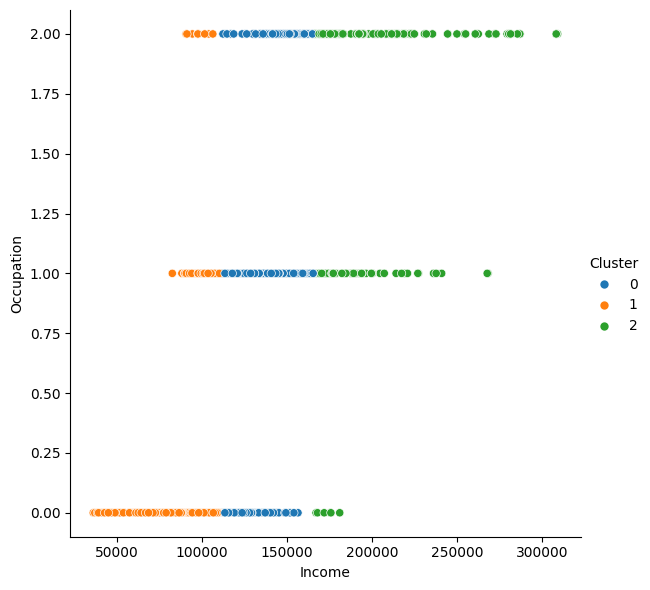

In [ ]:
sns.relplot(
    x="Income", y="Occupation", hue="Cluster", data=df_IO, height=6,
);

# **Income-Settlement size**

In [ ]:
kmeans = KMeans(n_clusters=3)

df_IS["Cluster"] = kmeans.fit_predict(df_IS)
df_IS["Cluster"] = df_IS["Cluster"].astype("category")

df_IS.head()

,Income,Settlement size,Cluster
0,124670,2,0
1,150773,2,0
2,89210,0,2
3,171565,1,1
4,149031,1,0


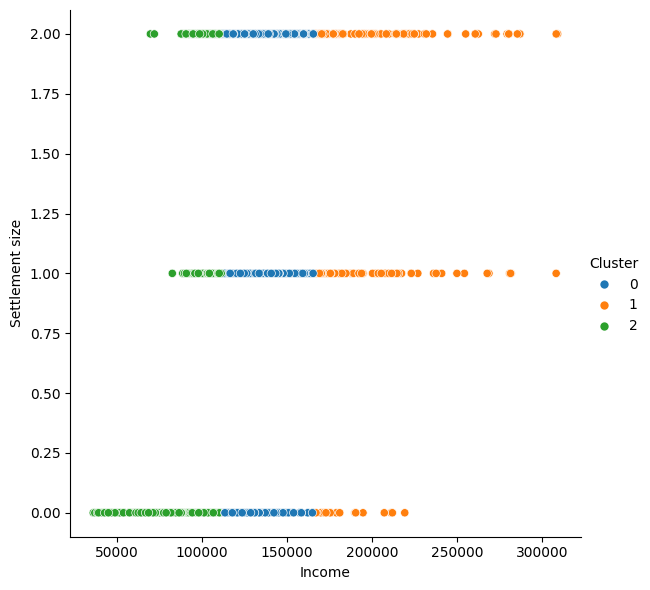

In [ ]:
sns.relplot(
    x="Income", y="Settlement size", hue="Cluster", data=df_IS, height=6,
);

# **3 Variables**

In [ ]:
df_c = df.copy()
df_c = df_c.drop(["ID"],axis=1)

In [ ]:
df_c1 = df_c[['Income','Education','Age']]

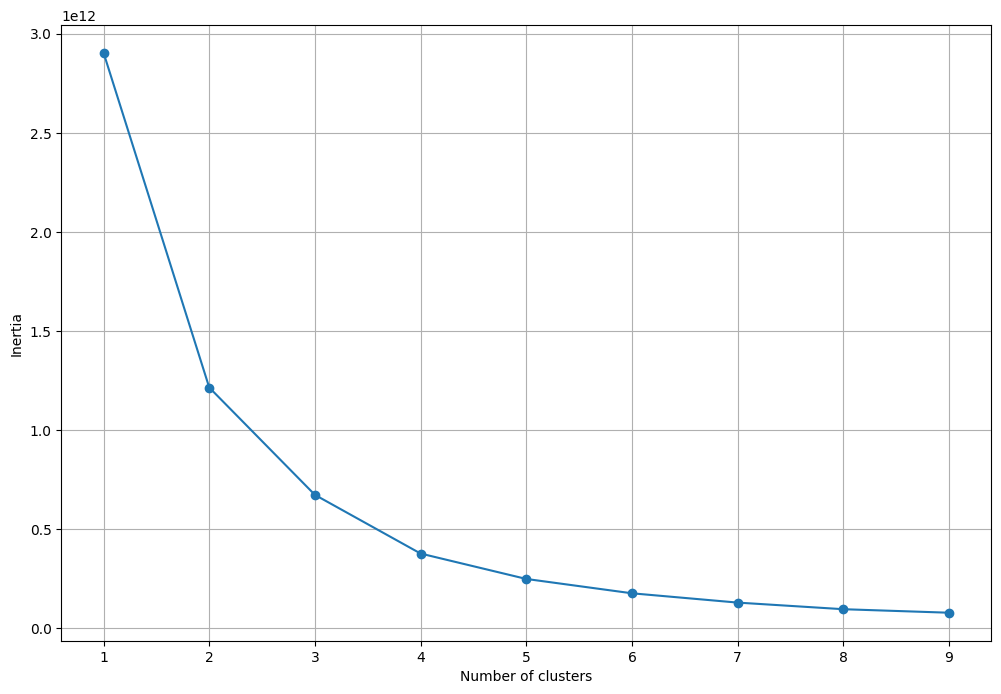

In [ ]:
optimize_k_means(df_c1,10)

In [ ]:
kmeans = KMeans(n_clusters=4,max_iter=1000)
kmeans.fit(df_c1)

# Add cluster labels to the dataframe
df_c1['Cluster'] = kmeans.labels_
df_c1['Cluster'] = df_c1['Cluster'].astype('category')

In [ ]:
df_c1.head()

,Income,Education,Age,Cluster
0,124670,2,67,0
1,150773,1,22,3
2,89210,1,49,2
3,171565,1,45,3
4,149031,1,53,3


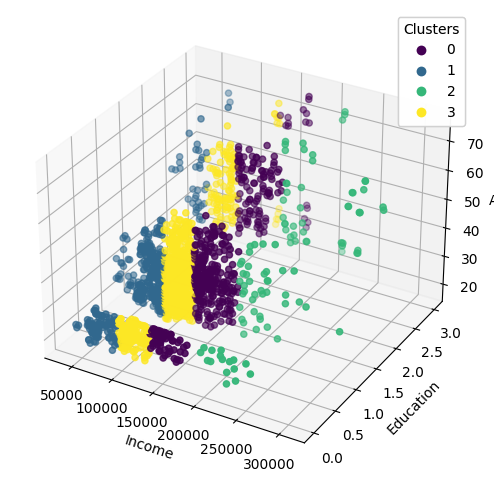

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
fig.set_size_inches(10, 6)
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_c1['Income'], df_c1['Education'], df_c1['Age'], c=df_c1['Cluster'], cmap='viridis')

# Legend and plot display
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.xlabel('Income')
plt.ylabel('Education')
ax.set_zlabel('Age')
plt.show()

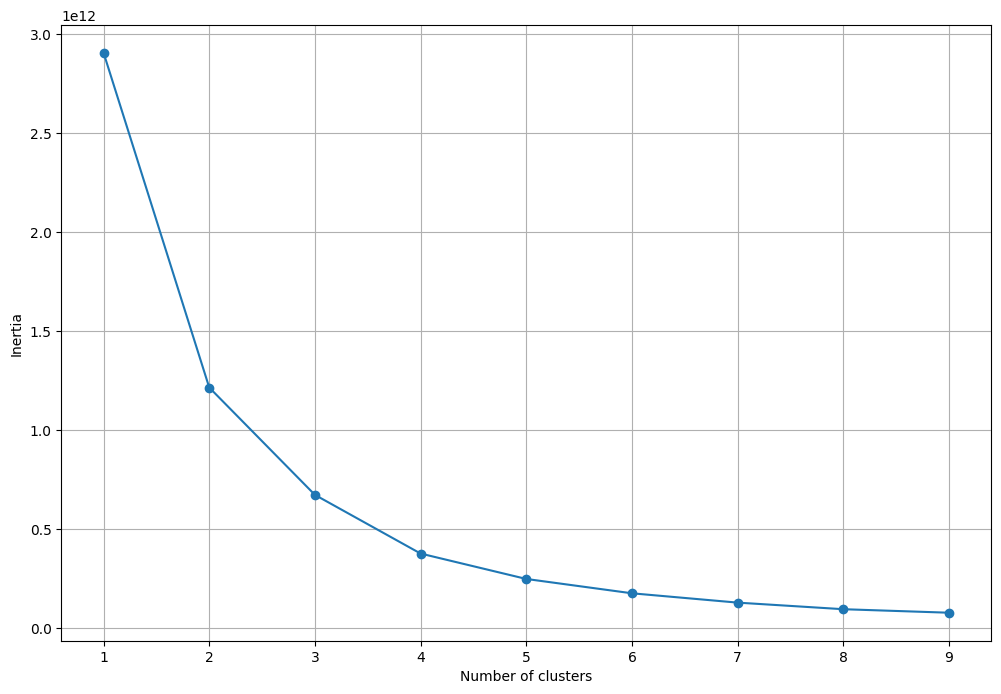

In [ ]:
optimize_k_means(df,10)

In [ ]:
kmeans = KMeans(n_clusters=4,max_iter=1000)
kmeans.fit(df)

# Add cluster labels to the dataframe
df['Cluster'] = kmeans.labels_
df['Cluster'] = df['Cluster'].astype('category')
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,100000001,0,0,67,2,124670,1,2,1
1,100000002,1,1,22,1,150773,1,2,0
2,100000003,0,0,49,1,89210,0,0,3
3,100000004,0,0,45,1,171565,1,1,0
4,100000005,0,0,53,1,149031,1,1,0
...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,1
1996,100001997,1,1,27,1,117744,1,0,1
1997,100001998,0,0,31,0,86400,0,0,3
1998,100001999,1,1,24,1,97968,0,0,1


In [ ]:
df.loc[df['Cluster']].describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


<Axes: xlabel='Sex', ylabel='Density'>

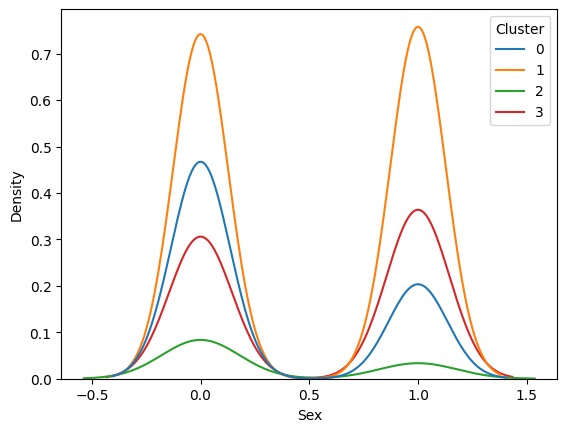

In [ ]:
sns.kdeplot(data=df,x='Sex',hue='Cluster')

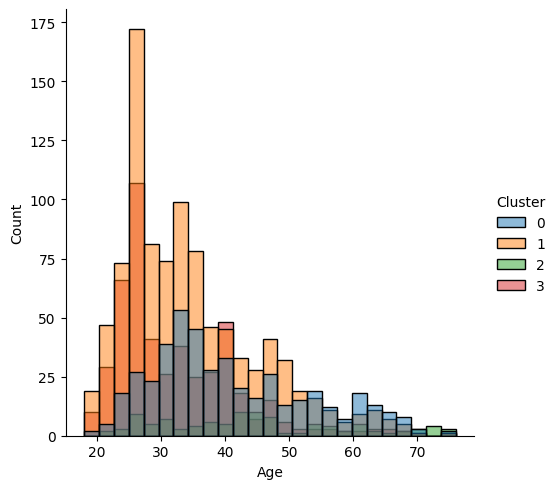

In [ ]:
sns.displot(data=df,x='Age',hue='Cluster')

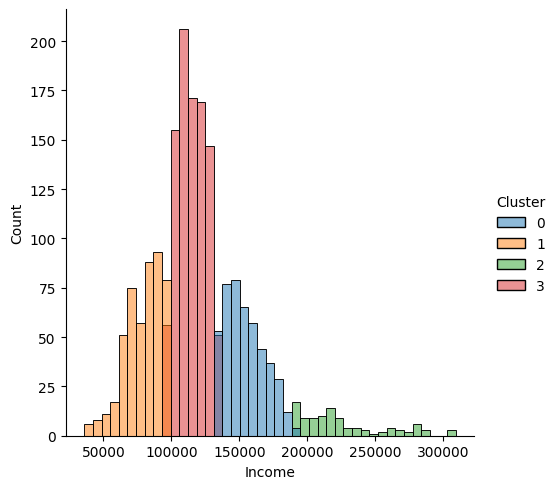

In [ ]:
sns.displot(data=df,x='Income',hue='Cluster')

<Axes: xlabel='Age', ylabel='Income'>

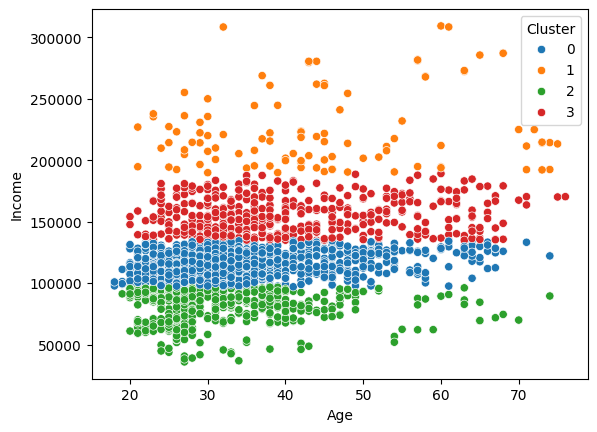

In [ ]:
sns.scatterplot(data=df,x='Age',y='Income',hue='Cluster')

<Axes: xlabel='Marital status', ylabel='Density'>

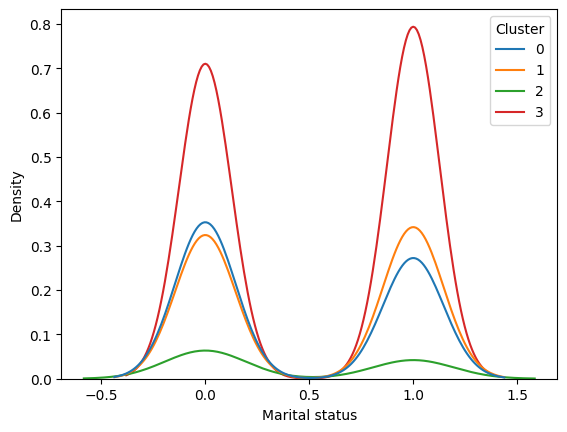

In [ ]:
sns.kdeplot(data=df,x='Marital status',hue='Cluster')

<Axes: xlabel='Education', ylabel='Density'>

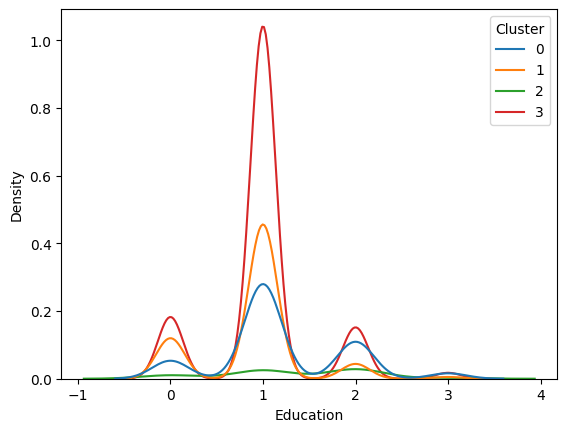

In [ ]:
sns.kdeplot(data=df,x='Education',hue='Cluster')

<Axes: xlabel='Occupation', ylabel='Density'>

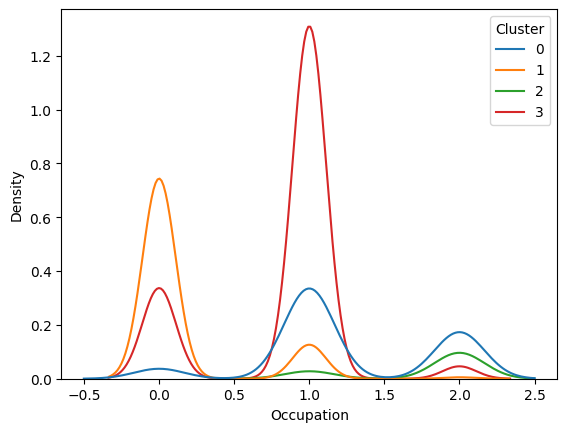

In [ ]:
sns.kdeplot(data=df,x='Occupation',hue='Cluster')

<Axes: xlabel='Settlement size', ylabel='Density'>

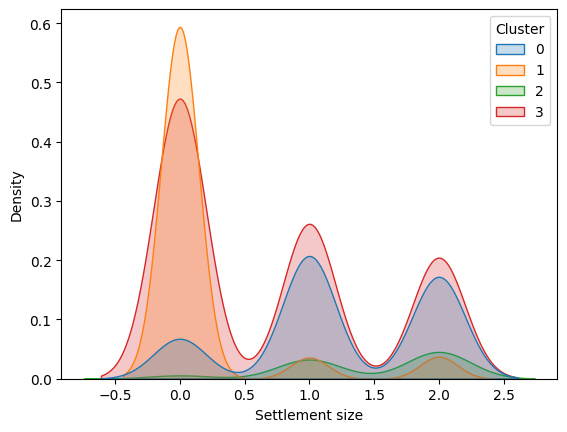

In [ ]:
sns.kdeplot(data=df,x='Settlement size',hue='Cluster',shade=True)

<Axes: xlabel='Income', ylabel='Education'>

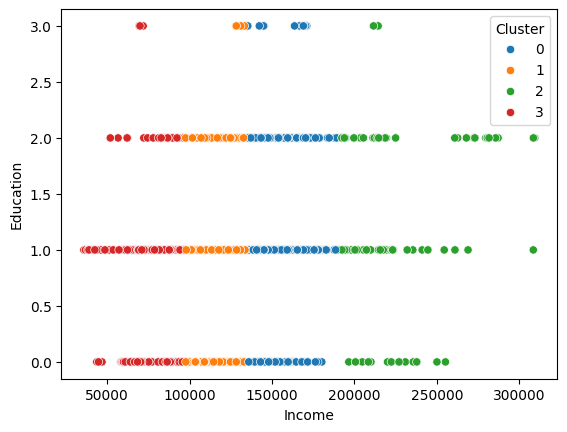

In [ ]:
sns.scatterplot(data=df,x='Income',y='Education',hue='Cluster')

<Axes: xlabel='Income', ylabel='Occupation'>

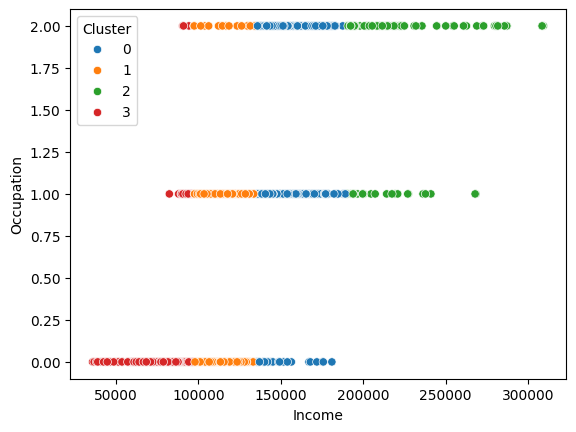

In [ ]:
sns.scatterplot(data=df,x='Income',y='Occupation',hue='Cluster')

<Axes: xlabel='Income', ylabel='Settlement size'>

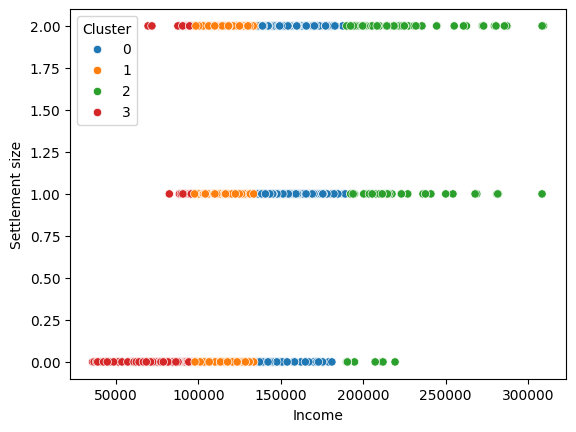

In [ ]:
sns.scatterplot(data=df,x='Income',y='Settlement size',hue='Cluster')

<Axes: xlabel='Income', ylabel='Sex'>

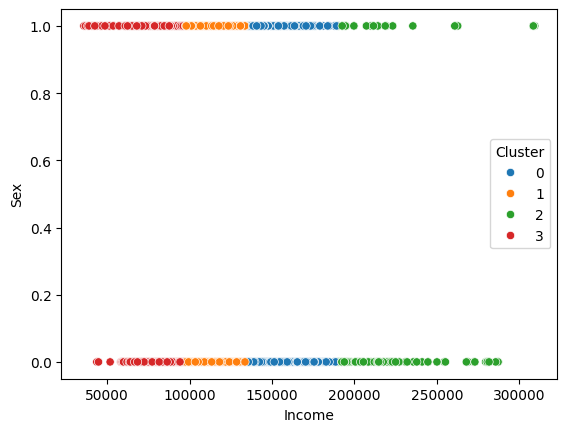

In [ ]:
sns.scatterplot(data=df,x='Income',y='Sex',hue='Cluster')

<Axes: xlabel='Age', ylabel='Settlement size'>

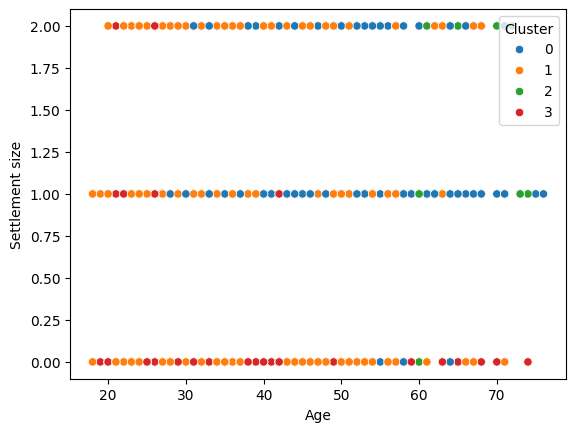

In [ ]:
sns.scatterplot(data=df,x='Age',y='Settlement size',hue='Cluster')

In [ ]:
df.to_csv('df_cluster.csv')

In [ ]:
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,100000001,0,0,67,2,124670,1,2,1
1,100000002,1,1,22,1,150773,1,2,0
2,100000003,0,0,49,1,89210,0,0,3
3,100000004,0,0,45,1,171565,1,1,0
4,100000005,0,0,53,1,149031,1,1,0
...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,1
1996,100001997,1,1,27,1,117744,1,0,1
1997,100001998,0,0,31,0,86400,0,0,3
1998,100001999,1,1,24,1,97968,0,0,1
